### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### Observações Implementação

In [2]:
# esqueci completamente da parte do kernel kkkkkkk rindo de chorar
# vai entrar só na kfcmkh oficial

In [3]:
# passo a passo: reunião com o professor

# basicamente tudo é matriz, não preciso muito inicialmente preocupar com o plot dos clusters
# a variação dos valores na matriz vai me contar se deu certo ou errado
# lembrar que conceitos com nomes muito específicos, tipo protótipos, tão definidpos lá na tabelinha de conceitos

# PASSO A PASSO
# matriz com os dados, depende do dataset (NxP)
# aí tem a matriz U, com os valores de membership (NxK, sendo o número de clusters)
# tem a matriz de protótipos também (G)(que é a matriz de centroides)
# trabalhar com a função objetivo em função de U e de G 
# primeiro fixa U e encontra G, depois vai pro passo 2
# protótipos podem ser definidos com base nos dados iniciais, por mim ou aleatoriamente 
# a foto está no celular e tem anotações no caderno

### DATASET

> Permanece o mesmo por enquanto;

In [4]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [5]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [6]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

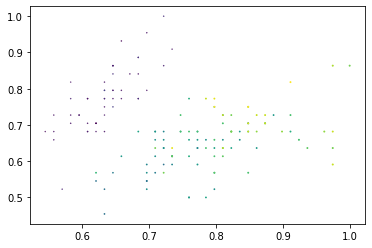

In [7]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

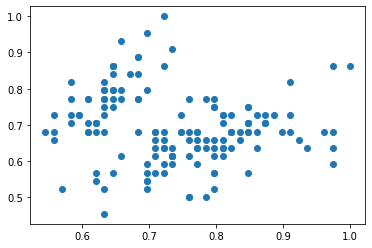

In [8]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

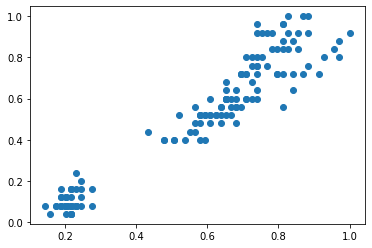

In [9]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### FUZZY C-MEANS

In [10]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [11]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [12]:
# number of clusters
    # acho que o K definido assim dá certo assim pq eu conheço o dataset né
    # mas no caso tb não tá dando tão certo assim no plot
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# colocar mais valores aqui 1.1, 1.6 e 2


# membership
U = np.random.rand(iris_data_without_last_column.shape[0], K)
U # lembrando que os dados já foram normalizados

array([[0.68406565, 0.61590516, 0.61699836],
       [0.51154132, 0.7633299 , 0.70038107],
       [0.32510746, 0.20672594, 0.92199401],
       [0.00109924, 0.10593612, 0.85127844],
       [0.98385575, 0.8078383 , 0.8023761 ],
       [0.94755644, 0.78895979, 0.27816925],
       [0.73369856, 0.2752318 , 0.63548078],
       [0.67174417, 0.85262882, 0.26060949],
       [0.98941729, 0.91153597, 0.56201132],
       [0.00380013, 0.57752658, 0.38779321],
       [0.04328658, 0.85635946, 0.36978966],
       [0.02489934, 0.81918917, 0.59923373],
       [0.11167095, 0.54802563, 0.63872958],
       [0.28649465, 0.52434866, 0.43554699],
       [0.02150498, 0.40334204, 0.32480372],
       [0.99077336, 0.00745083, 0.73157266],
       [0.67907021, 0.93757825, 0.5106793 ],
       [0.80298713, 0.26170187, 0.56710515],
       [0.26432299, 0.42251053, 0.87500101],
       [0.48596683, 0.95283527, 0.11104651],
       [0.39207558, 0.21922985, 0.56580133],
       [0.90789842, 0.88857309, 0.83329293],
       [0.

In [21]:
# calculo dos centroides/protótipos
# envolve matriz
# soma da multiplicação de cada 

# precisamos de 3 centroides pro caso do iris
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

In [22]:
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

def distancia_gaussiana(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a distância usando a função gaussiana entre as matrizes x e y.

    Parâmetros:
    - x, y: os pontos a serem comparados, sendo eles os dados e os centroides.
    - sigma: PARÂMETRO QUE CONTROLA A > LARGURA < DO KERNEL GAUSSIANO

    Retorna:
    - Uma matriz de distâncias onde cada elemento (i, j) representa a distância gaussiana entre x[i] e y[j].
    """
    #print("Shapes em distancia_gaussiana:")
    #print("x shape:", iris_data_without_last_column.shape)
    #print("y shape:", centroides.shape)
    #print()
    
    # tentando resolver o problema dimensional
    iris_data_without_last_column = iris_data_without_last_column.reshape(1, -1)
    
    #euclidiana = np.linalg.norm(iris_data_without_last_column[:, np.newaxis, :] - centroides, axis=1)  # Distâncias euclidianas entre todos os pares de pontos
    diferenca = iris_data_without_last_column - centroides
    euclidiana = np.sqrt(np.sum(diferenca**2))
    gaussian_values = np.exp(- (euclidiana**2) / (2 * sigma**2))  # Função gaussiana # dá pra escrever o sigma diferente se der erro
    return gaussian_values

In [23]:
# acaba sendo euclidiana normal mesmo
# pelo menos por enquanto

In [24]:
def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

In [25]:
d_matriz = matriz_dg(iris_data_without_last_column, centroides)

# Exibe a matriz de distâncias
print("Matriz de Distâncias:")
print(d_matriz)

Matriz de Distâncias:
[[0.77762516 0.77691132 0.77696504]
 [0.67362158 0.67302389 0.67289531]
 [0.69190319 0.69114818 0.69128658]
 [0.66923927 0.66859352 0.6684978 ]
 [0.78862227 0.78786316 0.7879853 ]
 [0.87772412 0.87736912 0.87674339]
 [0.72186154 0.72125168 0.72109707]
 [0.75344664 0.75278628 0.75272686]
 [0.6164721  0.61579887 0.61577064]
 [0.69589621 0.6951325  0.69527141]
 [0.83779912 0.83712723 0.8370968 ]
 [0.7404292  0.73977616 0.73967247]
 [0.66903444 0.66822845 0.66846255]
 [0.62762909 0.62653935 0.62730345]
 [0.91934226 0.91855229 0.9187845 ]
 [0.98933779 0.98881216 0.988514  ]
 [0.87219398 0.87168701 0.87139319]
 [0.77664803 0.77609715 0.77586436]
 [0.88104431 0.88061682 0.88013733]
 [0.83349806 0.83290075 0.83271808]
 [0.78826251 0.78776148 0.7874142 ]
 [0.81583785 0.81542551 0.8149245 ]
 [0.75790434 0.75689282 0.75751534]
 [0.75049745 0.750488   0.74927085]
 [0.7474249  0.74690903 0.74651231]
 [0.68542163 0.68494312 0.68457293]
 [0.75529714 0.75501854 0.75427294]
 [0.78

In [26]:
def fun_objetivo(U, matriz_dg, m):
    c, n = U.shape
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

In [27]:
#print(d_matriz) #supostamente, distância de cada ponto em relação a cada centroide

**OBSERVAÇÕES**
<br>uh to meio na dúvida aqui
<br> preciso que a distância seja calculada para cada ponto em relação a cada um dos centroides, mas não sei <br>se isso está acontecendo
<br>ACHO que é isso que está rolando sim

In [31]:
#lembrando que alterei os valores definidos antes
    # antes era uma constante e agora é uma lista
def membership_c(iris_data_without_last_column, centroides, K, m):
    U_novo = np.zeros_like(d_matriz)

    for i in range(K):
        U_novo[:, i] = d_matriz[:, i]

    for j in range(len(m)):
        U_novo = 1/(U_novo ** (2/(m[j]-1)) * np.sum((1/U_novo) ** (2/(m[j]-1)), axis=1)[:, np.newaxis])

    return U_novo

# Ou simplesmente copiar todos os valores da matriz de distâncias para U_novo (?)
#U_novo = d_matriz.copy()

In [32]:
U_novo = membership_c(iris_data_without_last_column, centroides, K, m)

In [33]:
N = iris_data_without_last_column.shape[0] # número de dados

In [34]:
#U_novo = 1/(U_novo ** (2/(m-1)) * np.sum((1/U_novo) ** (2/(m-1)), axis = 1)[:, np.newaxis])
#U_novo
#U_novo = membership_c(iris_data_without_last_column, centroides, K, m)

In [35]:
velho_obj = fun_objetivo(U_novo, d_matriz, m)

In [39]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg(iris_data_without_last_column, centroides)

for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = membership_c(iris_data_without_last_column, centroides, K, m)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg(iris_data_without_last_column, centroides)

    # Calcular função objetivo
    novo_objetivo = fun_objetivo(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo

In [40]:
print("Centroides finais:")
print(centroides)
print()
print("Pertinências dos dados aos centroides:")
print(U)

Centroides finais:
[[0.18535088 0.17364292 0.13707007 0.12098975]
 [0.17968163 0.17879552 0.11854689 0.09957535]
 [0.18802913 0.16926734 0.1478576  0.13311616]]

Pertinências dos dados aos centroides:
[[0.30767726 0.34775699 0.34456575]
 [0.30484685 0.34314977 0.35200338]
 [0.30460539 0.35233792 0.34305669]
 [0.30333758 0.34500664 0.35165578]
 [0.30761959 0.34976773 0.34261268]
 [0.31092906 0.32816089 0.36091005]
 [0.3057136  0.34218195 0.35210445]
 [0.306755   0.34479834 0.34844666]
 [0.30113525 0.34836425 0.35050051]
 [0.30442319 0.35242081 0.34315601]
 [0.30948105 0.34442279 0.34609616]
 [0.30572443 0.34389406 0.35038151]
 [0.30347751 0.35639203 0.34013046]
 [0.30008433 0.37833085 0.32158482]
 [0.31194177 0.34982588 0.33823234]
 [0.31339133 0.336403   0.35020567]
 [0.31143937 0.33654387 0.35201677]
 [0.30832652 0.33892111 0.35275237]
 [0.31113353 0.33193255 0.35693391]
 [0.30928534 0.34030741 0.35040725]
 [0.30837018 0.33565216 0.35597766]
 [0.30951961 0.33110256 0.35937783]
 [0.306